In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
data_raw=pd.read_csv("./data/Train.csv")
meta=pd.read_csv("./data/airqo_metadata.csv")

In [3]:
from files.preprocessing import *

In [4]:
data = preprocessing(data_raw, use_location=False, only_means=True)

/Users/denniseickhorn/neuefische/ML-Project-1/files/preprocessing.py:48: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(features,1,inplace=True)


In [5]:
data['target'] = (data['target']>56).astype(int)
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred_test = LogReg.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print('accuracy(test): ', accuracy_score(y_test, y_pred_test))
print('recall: ', recall_score(y_test, y_pred_test))
print('precision: ', precision_score(y_test, y_pred_test))
y_pred_train = LogReg.predict(X_train)
print('accuracy(train): ', accuracy_score(y_train, y_pred_train))

[[1862  122]
 [ 980  144]]
accuracy(test):  0.6454311454311454
recall:  0.12811387900355872
precision:  0.5413533834586466
accuracy(train):  0.6540101359504464


<AxesSubplot:>

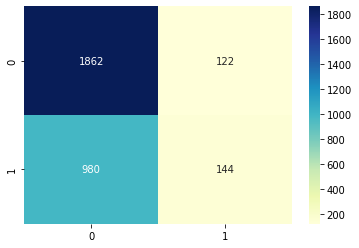

In [7]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap="YlGnBu")